In [400]:
from sklearn.datasets import load_breast_cancer
breastCancer = load_breast_cancer()

In [401]:
#print(breastCancer.DESCR)   # Describe breast cancer dataset

Dataset Info

In [402]:
breastCancer.target[500]   # target is a lable; 0 means healthy person, 1 means sick person; 500 means person number 500

1

In [403]:
breastCancer.target.shape # this shows number of labels

(569,)

In [404]:
breastCancer.data[500] # this shows features of person number 500

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [405]:
breastCancer.data.shape # there are 569 people; Each person has 30 features

(569, 30)

## Preprocessing

In [406]:
# We are going to separate train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(breastCancer.data, breastCancer.target, test_size=0.21)

In [407]:
print(f"Feature => train: {x_train.shape} - test: {x_test.shape}")
print(f"Label => train: {y_train.shape} - test: {y_test.shape}")

Feature => train: (449, 30) - test: (120, 30)
Label => train: (449,) - test: (120,)


In [408]:
x_train[0]

array([1.481e+01, 1.470e+01, 9.466e+01, 6.807e+02, 8.472e-02, 5.016e-02,
       3.416e-02, 2.541e-02, 1.659e-01, 5.348e-02, 2.182e-01, 6.232e-01,
       1.677e+00, 2.072e+01, 6.708e-03, 1.197e-02, 1.482e-02, 1.056e-02,
       1.580e-02, 1.779e-03, 1.561e+01, 1.758e+01, 1.017e+02, 7.602e+02,
       1.139e-01, 1.011e-01, 1.101e-01, 7.955e-02, 2.334e-01, 6.142e-02])

### Normalizing the data

In [409]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [410]:
x_train[0]

array([0.34743143, 0.16875211, 0.33247973, 0.21613125, 0.28969938,
       0.09441139, 0.08003749, 0.12629225, 0.26268019, 0.07413648,
       0.03863842, 0.08001704, 0.0433492 , 0.02599561, 0.14197379,
       0.07298645, 0.03742424, 0.20003789, 0.11141442, 0.03054738,
       0.24579149, 0.14818763, 0.23156001, 0.12957473, 0.23806052,
       0.07390602, 0.0879393 , 0.2733677 , 0.15158683, 0.05408613])

### Classification

In [411]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def calculate_metrics(y_train, y_test, y_predic_train, y_predic_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_predic_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_predic_test)

    percision = precision_score(y_true=y_test, y_pred=y_predic_test)
    recall = recall_score(y_true=y_test, y_pred=y_predic_test)

    print(f"acc train: {acc_train} - acc test: {acc_test} - percision: {percision} - recall: {recall}")

    return acc_train, acc_test, percision, recall

### Creating a function for calculating the accuracy

- Naive Bayes Algorithm

In [412]:
from sklearn.naive_bayes import  GaussianNB
GaussianNaiveBayes = GaussianNB()
GaussianNaiveBayes.fit(x_train, y_train)

GaussianNB()

In [413]:
y_predic_train = GaussianNaiveBayes.predict(x_train)
y_predic_test = GaussianNaiveBayes.predict(x_test)

acc_train_gnb, acc_test_gnb, percision_gnb, recall_gnb = calculate_metrics(y_train, y_test, y_predic_train, y_predic_test)

acc train: 0.9398663697104677 - acc test: 0.9416666666666667 - percision: 0.9473684210526315 - recall: 0.96


- KNN algorithm

In [414]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [415]:
y_predic_train = knn.predict(x_train)
y_predic_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, percision_knn, recall_knn = calculate_metrics(y_train, y_test, y_predic_train, y_predic_test)

acc train: 0.9732739420935412 - acc test: 0.975 - percision: 0.9864864864864865 - recall: 0.9733333333333334


- Decision tree algorithm

In [416]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(max_depth=128, min_samples_split=4, criterion='entropy')
DecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=128, min_samples_split=4)

In [417]:
y_predic_train = DecisionTree.predict(x_train)
y_predic_test = DecisionTree.predict(x_test)

acc_train_dt, acc_test_dt, percision_dt, recall_dt = calculate_metrics(y_train, y_test, y_predic_train, y_predic_test)

acc train: 1.0 - acc test: 0.9666666666666667 - percision: 0.9863013698630136 - recall: 0.96


- Random forest algorithm

In [418]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=1000, max_depth=64, min_samples_split=8)
RandomForest.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=1000)

In [419]:
y_predic_train = RandomForest.predict(x_train)
y_predic_test = RandomForest.predict(x_test)

acc_train_rf, acc_test_rf, percision_rf, recall_rf = calculate_metrics(y_train, y_test, y_predic_train, y_predic_test)

acc train: 0.9933184855233853 - acc test: 0.9583333333333334 - percision: 0.9605263157894737 - recall: 0.9733333333333334


- SVM algorithm

In [420]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [421]:
y_predic_train = svm.predict(x_train)
y_predic_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, percision_svm, recall_svm = calculate_metrics(y_train, y_test, y_predic_train, y_predic_test)

acc train: 0.9888641425389755 - acc test: 0.9833333333333333 - percision: 0.974025974025974 - recall: 1.0


- Logistic regresion algorithm

In [422]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(x_train, y_train)

LogisticRegression()

In [423]:
y_predic_train = LogisticRegression.predict(x_train)
y_predic_test = LogisticRegression.predict(x_test)

acc_train_lr, acc_test_lr, percision_lr, recall_lr = calculate_metrics(y_train, y_test, y_predic_train, y_predic_test)

acc train: 0.9665924276169265 - acc test: 0.9916666666666667 - percision: 0.9868421052631579 - recall: 1.0


- ANN: Aritificial Nural Network

In [426]:
from sklearn.neural_network import MLPClassifier
MLPClassifier = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam', batch_size=64)
MLPClassifier.fit(x_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=512)

In [427]:
y_predic_train = MLPClassifier.predict(x_train)
y_predic_test = MLPClassifier.predict(x_test)

acc_train_mlp, acc_test_mlp, percision_mlp, recall_mlp = calculate_metrics(y_train, y_test, y_predic_train, y_predic_test)

acc train: 0.9643652561247216 - acc test: 0.9833333333333333 - percision: 0.9866666666666667 - recall: 0.9866666666666667


### Comparision

- Comparing accuracy for train data

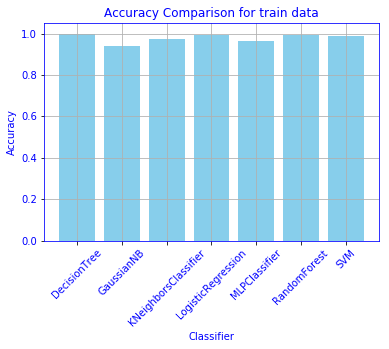

In [438]:
import matplotlib.pylab as plt

acc = [acc_train_dt, acc_train_gnb, acc_train_knn, acc_train_mlp, acc_train_rf, acc_test_lr, acc_train_svm]
title = ["DecisionTree", "GaussianNB", "KNeighborsClassifier", "MLPClassifier", "RandomForest", "LogisticRegression", "SVM"]

plt.bar(title, acc, color='skyblue') 
plt.grid()

plt.xlabel("Classifier", color='blue')
plt.ylabel("Accuracy", color='blue')
plt.title("Accuracy Comparison for train data", color='blue')

plt.xticks(color='blue', rotation=45)
plt.yticks(color='blue')

ax = plt.gca()
ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')
ax.spines['right'].set_color('blue')
ax.spines['left'].set_color('blue')

plt.show()


- Comparing accuracy for test data

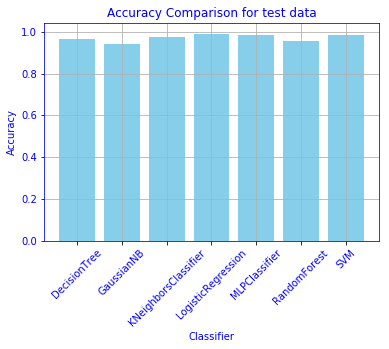

In [437]:
import matplotlib.pylab as plt

acc = [acc_test_dt, acc_test_gnb, acc_test_knn, acc_test_mlp, acc_test_rf, acc_test_lr, acc_test_svm]
title = ["DecisionTree", "GaussianNB", "KNeighborsClassifier", "MLPClassifier", "RandomForest", "LogisticRegression", "SVM"]

plt.bar(title, acc, color='skyblue') 
plt.grid()

plt.xlabel("Classifier", color='blue')
plt.ylabel("Accuracy", color='blue')
plt.title("Accuracy Comparison for test data", color='blue')

plt.xticks(color='blue', rotation=45)
plt.yticks(color='blue')

ax = plt.gca()
ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')
ax.spines['right'].set_color('blue')
ax.spines['left'].set_color('blue')

plt.show()